Roll:No:225229106

# PML Lab6. Predictive Analytics for Hospitals

# Step:1 [import dataset]

In [1]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

# Step:2 [identify relationships between feature]

<AxesSubplot:>

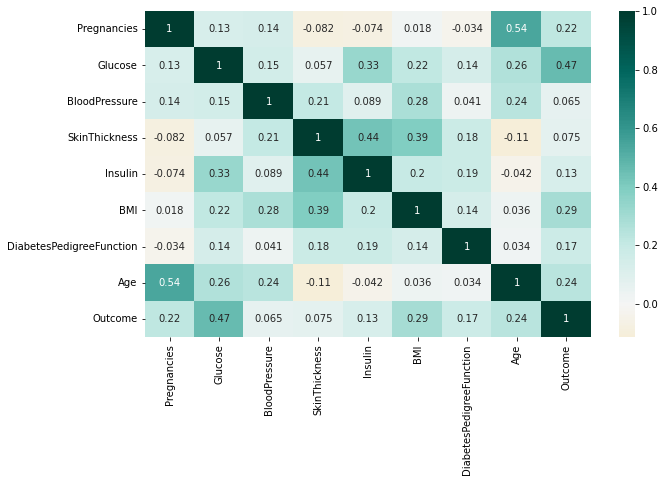

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

# Step:3 [prediction using one feature]

In [34]:
X=df[['Age']]
y=df[['Outcome']]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
#model parameter values
print("coef_ : ",lr.coef_)
print("intercept_ : ",lr.intercept_)

coef_ :  [[0.04741434]]
intercept_ :  [-2.213557]


In [41]:
lr.predict([[60]])

array([1], dtype=int64)

In [46]:
lrf=lr.coef_*60+lr.intercept_
from scipy.special import expit
a=expit(lrf)
a

array([[0.65278491]])

In [48]:
if a>.5:
    print('Yes he will become diabetic')
else:
    print('No, he will not be diabetic')

Yes he will become diabetic


# Step:4 [Prediction using many features]

In [49]:
X1=df[['Glucose','BMI','Age']]
y1=df[['Outcome']]

In [50]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.25,random_state=42)
lr1=LogisticRegression()
lr1.fit(X1_train,y1_train)
lr1.predict(X1_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
#model parameter values
print("coef_ : ",lr1.coef_)
print("intercept_ : ",lr1.intercept_)

coef_ :  [[0.0244408  0.04999901 0.02717807]]
intercept_ :  [-6.15377769]


In [65]:
lrf=lr1.coef_*150*30*40+lr1.intercept_
from scipy.special import expit
expit(lrf)

array([[1., 1., 1.]])

In [66]:
lr1.predict([[150,30,40]])

array([1], dtype=int64)

In [56]:
lr1.predict_proba([[150,30,40]])

array([[0.47516153, 0.52483847]])

# Step:5 [Build LoR model with all features]

In [64]:
X2=df.drop(['Outcome'],axis=1)
y2=df[['Outcome']]
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.25,random_state=42)
lr2=LogisticRegression()
lr2.fit(X2_train,y2_train)
lr2.predict(X2_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
y2_pred=lr2.predict(X2_test)
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Accuracy:

In [62]:
from sklearn.metrics import roc_auc_score
lor_auc3=roc_auc_score(y2_test,y2_pred)
lor_auc3

0.7180982679392012

# step:6 [Forward Selection Procedure ]

In [69]:
def get_auc(var,tar,df):
    fX=df[var]
    fy=df[tar]
    lr4=LogisticRegression()
    lr4.fit(fX,fy)
    pred=lr4.predict_proba(fX)[:,1]
    auc_val=roc_auc_score(y2,pred)
    return auc_val
get_auc(['Glucose','BMI'],['Outcome'],df)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8102835820895523

In [70]:
get_auc(['Pregnancies','BloodPressure','SkinThickness'],['Outcome'],df)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6420932835820895

In [91]:
#define a function best_next()
def best_next(current,cand,tar,df):
    best_auc=-1
    best_var=None
    for i in cand:
        auc_v=get_auc(current+[i],tar,df)
        if auc_v>=best_auc:
            best_auc=auc_v
            best_var=i
    return best_var

In [92]:
tar=['Outcome']
current=['Insulin','BMI','DiabetesPedigreeFunction','Age']
cand=['Pregnancies','Glucose','BloodPressure','SkinThickness']
next_var=best_next(current,cand,tar,df)
print(next_var)

Glucose


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
tar = ["Outcome"]
current =[]
cand =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
max_num = 7
num_it = min(max_num, len(cand))
for i in range(0, num_it):
    next_var = best_next(current, cand, tar, df)
    current += [next_var]
    cand.remove(next_var)
    print("Variable added in Step "+str(i+1) +' is ' + next_var +".")

Variable added in Step 1 is Glucose.
Variable added in Step 2 is BMI.
Variable added in Step 3 is Pregnancies.
Variable added in Step 4 is DiabetesPedigreeFunction.
Variable added in Step 5 is Insulin.
Variable added in Step 6 is SkinThickness.
Variable added in Step 7 is Age.


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
print(current)

['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'Age']


# step:7 [plot Line graph of AUC values and select cut-off]

In [104]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,stratify=y2,test_size=0.5,random_state=42)

In [106]:
prediction = lr2.predict_proba(X2_test)

In [110]:
train = pd.concat([X2_train, y2_train], axis =1)
test = pd.concat([X2_test, y2_test], axis =1)
def auc_train_test (variables, target, train, test):
    X_train = train [variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    lr3 = LogisticRegression()
    lr3.fit(X_train, Y_train)
    predictions_train = lr3.predict_proba(X_train)[:,1]
    predictions_test = lr3.predict_proba(X_test)[:,1]
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_train, predictions_test)
    return (auc_train, auc_test)
auc_values_train =[]
auc_values_test =[]
variables_evaluate=[]

for v in X2.columns:
    variables_evaluate.append(v)
    auc_train, auc_test = auc_train_test(variables_evaluate, ['Outcome'],train,test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


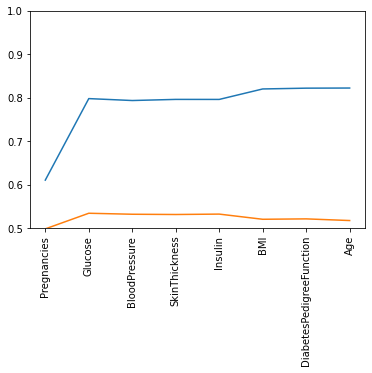

In [111]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x, X2.columns, rotation =90)

plt.plot(x, my_train)
plt.plot(x, my_test)
plt.ylim(0.5, 1)
plt.show()

# step:8 [Draw cumulative gain chart and lift chart]

In [116]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Defaulting to user installation because normal site-packages is not writeable


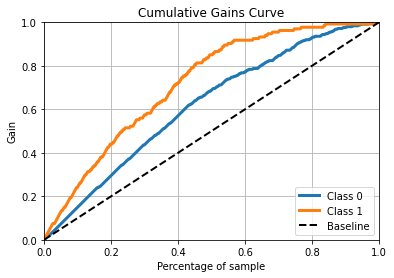

<Figure size 504x504 with 0 Axes>

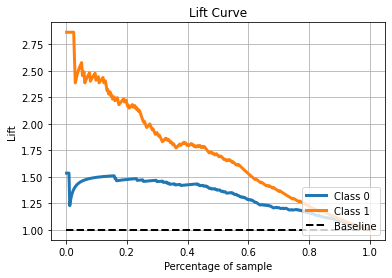

In [118]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y2_test, prediction)
plt.show()
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y2_test, prediction)
plt.show()